# Библиотеки

In [1]:
import pandas as pd
from IPython.display import Image

In [2]:
import math

import numpy as np; np.random.seed(13)
import matplotlib.pyplot as plt

In [3]:
import statistics
import seaborn as sns
import statsmodels.api as sm

import statsmodels.formula.api as smf

from scipy import stats
from numpy import random

In [4]:
import plotly.express as px
import plotly.graph_objects as go

# Линеная регрессия

[5 видов регрессии и их свойства](https://medium.com/nuances-of-programming/5-видов-регрессии-и-их-свойства-f1bb867aebcb)

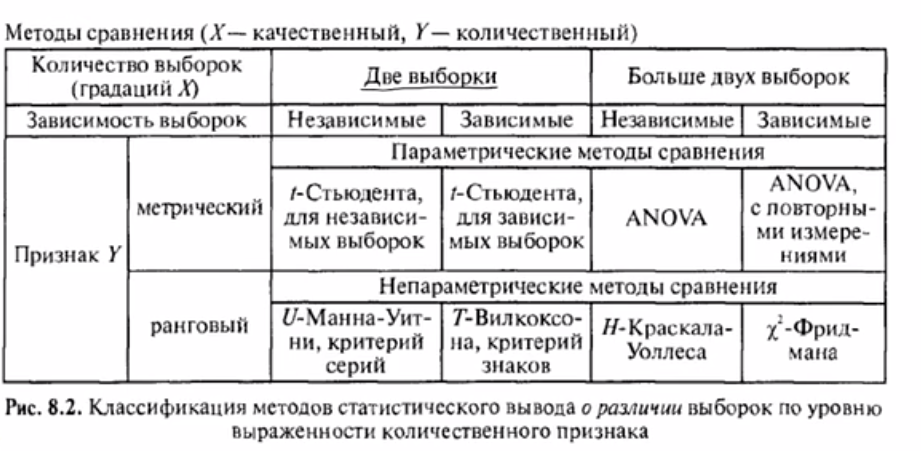

In [5]:
Image(filename='фото//output13.png')

**Основные допущения линейной регрессии**:
 - линейная связь между ЗП и НП
 - независомть наблюдейний 
 - независимость предикторов (проблема мультиколлинеарности)
 - Гомоскедастичность
 - номальное распредление остатков 
 - Отсутвие автокореляции в остатках 

<div class="alert alert-warning">
<h2> Линейные взаимосвязи </h2>
</div>

Трансформация Тьюки: основная идея трасформировать НП, чтобы ликвидировать нелинейность связи

Можно каждую из переменных возводить в степень, чтобы повысить R^2, то теряется интерпретация

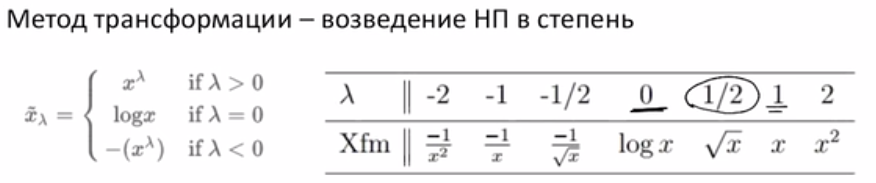

In [6]:
Image(filename='фото//output14.png')

In [7]:
mtcars = pd.read_csv('data//mtcars.csv')
mtcars.head(2)

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.9,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.9,2.875,17.02,0,1,4,4


При возведении в орицательную степень, дополнительно нужно умножить на минус 1 (рисунок 3 не правильный

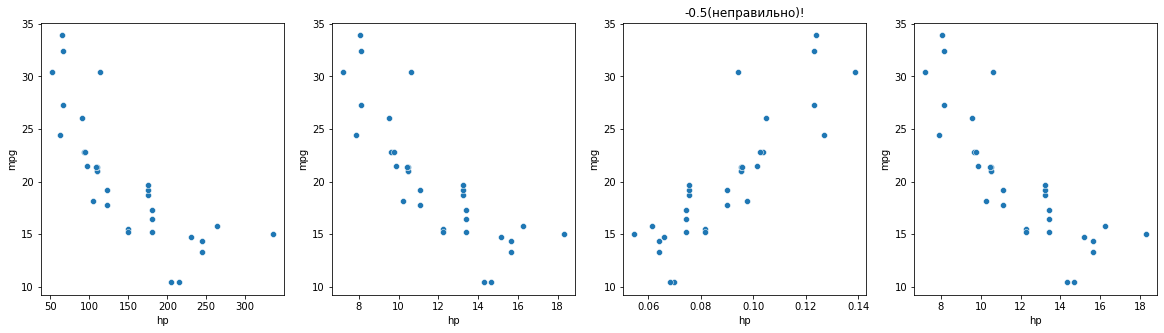

In [16]:
fig, axes = plt.subplots(1, 4, figsize = (20, 5))
for i, power  in enumerate([1, 1/2, -1/2, 1/2]):
    sns.scatterplot(y = mtcars['mpg'], x = mtcars['hp'] ** power * (-1 if i ==4 else 1), ax= axes[i])
    axes[i].set_title(str(power) + '(неправильно)!' if i == 2 else '' )

In [9]:
from scipy.stats.stats import pearsonr

In [10]:
# построим график взаимосвязи степени в которую надо возвести данные и корреляцией
box =[]
for i in np.arange(-5, 5, 0.01):
    if i == 0:
        corr_pers, p_value = pearsonr(mtcars['mpg'],  np,log(mtcars['hp']))
    else:
        corr_pers, p_value = pearsonr(mtcars['mpg'],  mtcars['hp'] ** i * (-1 if i <0 else 1))
    box.append([i, corr_pers**2])
corr_table = pd.DataFrame(box, columns = ['power', 'corr_coeff'])

0.7443802217195634

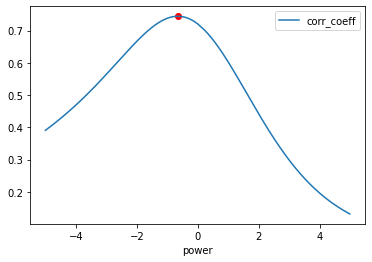

In [11]:
# график корреляции и степни
max_corr =corr_table['corr_coeff'].max()
corr_table.plot(x ='power', y ='corr_coeff')
plt.scatter(x =corr_table.query('corr_coeff == @max_corr')['power'].max(), y =max_corr, c ='r')
max_corr

<AxesSubplot:xlabel='hp', ylabel='mpg'>

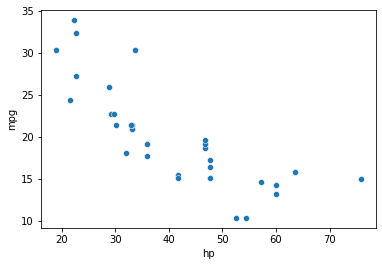

In [12]:
# результаты возведения в степень
sns.scatterplot(y = mtcars['mpg'], x = mtcars['hp'] ** max_corr * (-1 if max_corr < 0 else 1))

**Вывод:**
- результаты сложно интерпретировать ( за исключением логарифмирования)
- может быть переобучение

Трансформация переменных - хорошее решение, если мы хотим добиться линейной взаимосвязи между переменными. Индикатором нелинейной взаимосвязи между переменными может служить  ненормальное распределение остатков регрессии. При помощи трансформации Тьюки мы подбираем такой показатель степени, при котором  абсолютное значение корреляции
 между переменными X и Y будет максимальным.


<div class="alert alert-warning">
<h2> Логарифмическая трансформация переменных </h2>
</div>

In [27]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
y_ = np.log(mtcars.loc[:,'mpg'])   
x_ = np.log(mtcars.loc[:,'hp'])   

x_ = sm.add_constant(x_)

ols = sm.OLS(y_, x_)
res = ols.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     75.53
Date:                Thu, 05 Aug 2021   Prob (F-statistic):           1.08e-09
Time:                        17:23:42   Log-Likelihood:                 13.992
No. Observations:                  32   AIC:                            -23.98
Df Residuals:                      30   BIC:                            -21.05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5454      0.299     18.538      0.0

In [31]:
# интрепритация коэффициента при hp: при единичном увеличении  hp на 1% mpg уменьшится на -0.5301%

In [61]:
residuals = res.resid
mtcars['resid']= residuals

<AxesSubplot:xlabel='resid', ylabel='Count'>

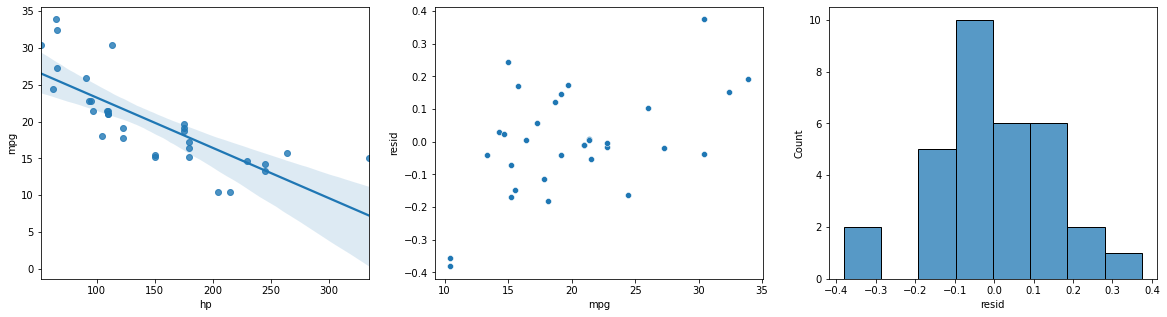

In [70]:
fif, axes = plt.subplots(1, 3, figsize = (20, 5))
# построиг решрессионную прямую через наши данные
sns.regplot(x=mtcars['hp'], y=mtcars['mpg'] ,ax= axes[0])
sns.scatterplot(y=mtcars['resid'], x=mtcars['mpg'] ,ax= axes[1])
sns.histplot(data = mtcars, x ='resid')

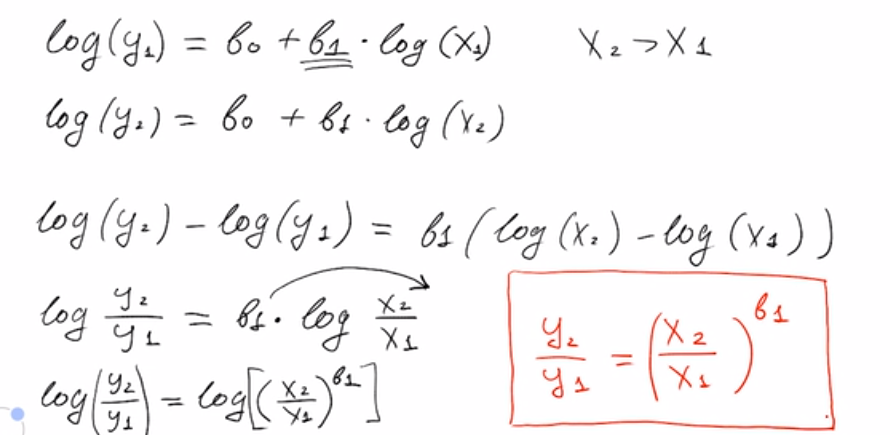

In [32]:
# b_1 показывает на сколько процентов увеличивается значения исходной при увеличении предикторов на 1 процент и  это говорит о нелинейной взаимосвязи
Image(filename='фото//output15.png')

В модели $log(Y)=b_1*X+b_0 $ коэффициент наклона означает: при единичном изменении переменной X, переменная Y в среднем изменяется на $100*b_1$
процентов.

В модели $Y=b_1*log(X)+b_0$   коэффициент наклона означает:  изменение на 1% по X в среднем приводит к изменению переменной Y на $0.01∗b_1$ единиц.

Строго говоря, в модели $log(Y)=b1∗X+b0$ при увеличении XX на единицу переменная YY в среднем изменится на $100(e^{b_1}-1)$ процентов. Выражение $100∗b_1$ можно рассматривать лишь как линейное приближение точного выражения при значениях $b_1$  близких к нулю.

Точно так же в модели $log(Y)=b1∗log(X)+b0$ при увеличении XX на 1% переменная YY в действительности изменится на $100((101/100)^{b_1}-1)$ процентов, что мало отличается от $b_1$ только при $b_1$, близких к нулю. Например, уже при b$_1=100b$ приращение Y составит не 100%, а около 170%. С увеличением $b_1b$ по модулю расхождение между указанными выражениями будет возрастать неограниченно.  

In [36]:
'''
В исследовании проверялась гипотеза о взаимосвязи мотивации студентов и денежного вознаграждения за проделанную работу. Исходные переменные оказались 
взаимосвязанными нелинейно, поэтому независимая переменная — денежное вознаграждение — была прологарифмирована (использовался натуральный логарифм). 
В результате была получена следующая модель:

мотивация = 120*log(вознаграждение) + 3мотивация=120∗log(вознаграждение)+3

Укажите, на сколько единиц в среднем увеличивается мотивация при увеличении вознаграждения на 10 процентов.  В ответе укажите целое число и не забывайте 
о правилах округления.
'''

'\nВ исследовании проверялась гипотеза о взаимосвязи мотивации студентов и денежного вознаграждения за проделанную работу. Исходные переменные оказались \nвзаимосвязанными нелинейно, поэтому независимая переменная — денежное вознаграждение — была прологарифмирована (использовался натуральный логарифм). \nВ результате была получена следующая модель:\n\nмотивация = 120*log(вознаграждение) + 3мотивация=120∗log(вознаграждение)+3\n\nУкажите, на сколько единиц в среднем увеличивается мотивация при увеличении вознаграждения на 10 процентов.  В ответе укажите целое число и не забывайте \nо правилах округления.\n'

mean = 11.437221576518937


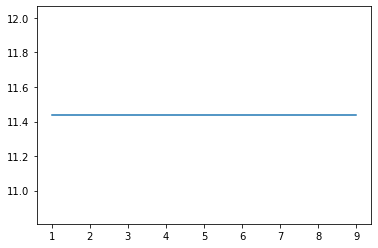

In [38]:
import numpy as np
import matplotlib.pyplot as plt

def add_10_percent(x1):
    res1 = 120 * np.log(x1) + 3
    res2 = 120 * np.log(x1 * 1.1) + 3
    return res2 - res1

print('mean =', add_10_percent(10)) #mean = 11.437221576518937

plt.plot(range(1,10,1), 
         [add_10_percent(i) for i in range(1,10, 1)])

In [ ]:
https://nagornyy.me/courses/data-science/regression/